### IDs:
Insert yours IDs to the cell below

ID #1: 316223650

ID #2: 301315040


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [4]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
#boston_df['target'] = boston.target


#boston_df.describe()

In [5]:
#Answers 1
print("Num of semples:" ,boston_df.shape[0])
print("Num of features:" ,boston_df.shape[1])
print("Type for each variable:" ,boston_df.dtypes)

print(boston.DESCR)


Num of semples: 506
Num of features: 13
Type for each variable: CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       

Text(0.04, 0.5, 'count')

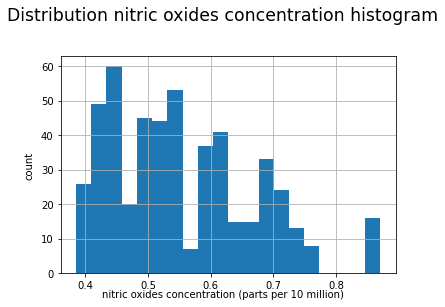

In [6]:
#Answers 2

# set up figure & axes
fig, axes = plt.subplots(nrows=1, sharex=True, sharey=True)

boston_df['NOX'].hist(bins=20)
# set title and axis labels
plt.suptitle('Distribution nitric oxides concentration histogram', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'nitric oxides concentration (parts per 10 million)', ha='center')
fig.text(0.04, 0.5, 'count', va='center', rotation='vertical')

Text(0.5, 1.05, 'Distribution nitric oxides concentration boxplot')

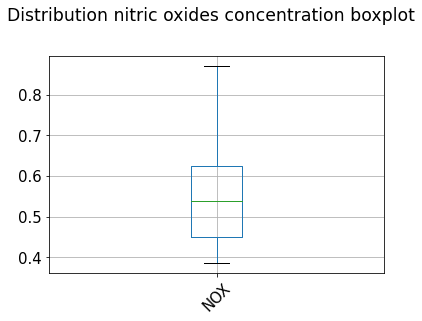

In [7]:
boston_df.boxplot(column=['NOX'],rot=45, fontsize=15)

plt.suptitle('Distribution nitric oxides concentration boxplot', x=0.5, y=1.05, ha='center', fontsize='xx-large')

describe the distribution

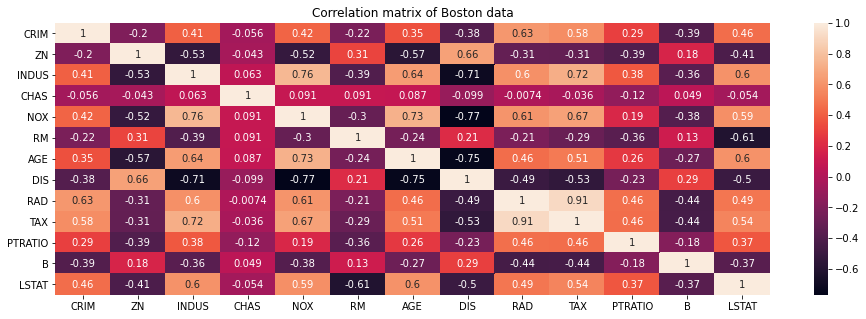

In [8]:
#Answers 3
correlation_mat = boston_df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of Boston data")
plt.show()

The correlated features is RAD & TAX with correlation of 0.91 ,
by the description RAD is index of accessibility to radial highways and TAX is full-value property-tax rate per $10,000
There also seems to be a negative correlation between:
    NOX & DIS 
    AGE & DIS
    
The feature with unusual behaviour is CHAS ,with no correlation to any aother features.
by the description is Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),
maybe becuse the values is only 1/0 its not correlated.

Text(0.5, 0.98, 'RAD and TAX JointPlot')

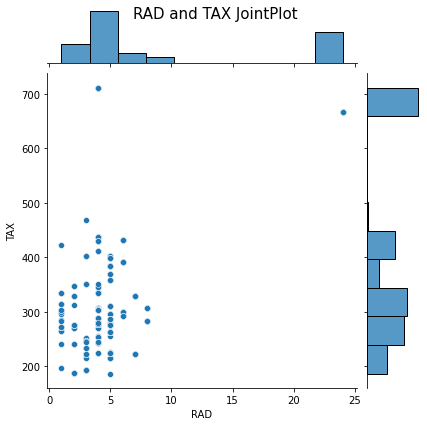

In [9]:
#Answers 4
jp = sns.jointplot(data=boston_df, x="RAD", y="TAX")
jp.fig.suptitle('RAD and TAX JointPlot', fontsize=15)

Text(0.5, 0.98, 'NOX and DIS JointPlot')

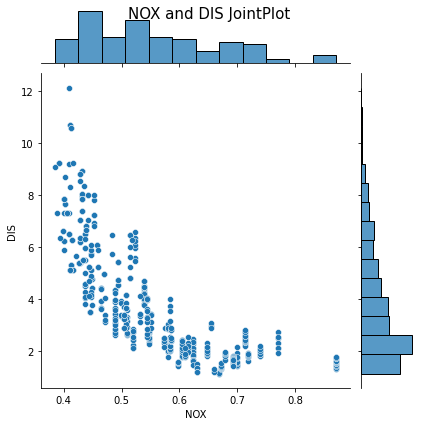

In [10]:
jp_nd = sns.jointplot(data=boston_df, x="NOX", y="DIS")
jp_nd.fig.suptitle('NOX and DIS JointPlot', fontsize=15 )

In [11]:
#Answers 5

cumulative_df = boston_df
# Get the frequency, PDF and CDF for each value in the series

# Frequency
cumulative_df = cumulative_df \
.groupby('AGE') \
['AGE'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'AGE': 'frequency'})

# PDF
cumulative_df['pdf'] = cumulative_df['frequency'] / sum(cumulative_df['frequency'])

# CDF
cumulative_df['cdf'] = cumulative_df['pdf'].cumsum()
cumulative_df = cumulative_df.reset_index()


In [12]:
cumulative_df['AGE'].quantile([0.25,0.75])

0.25    38.975
0.75    87.675
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Cumulative histogram of the age')

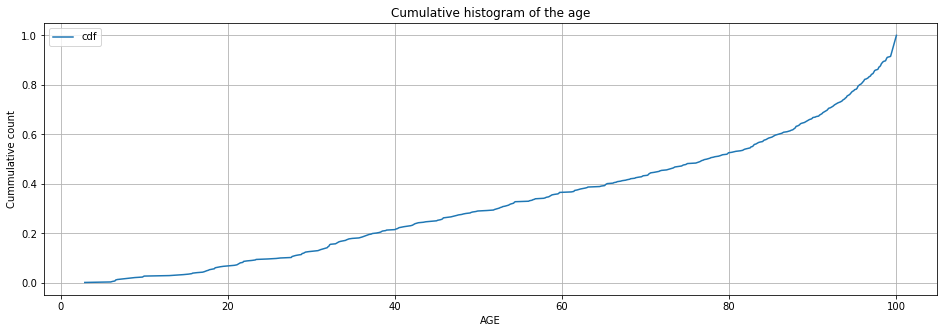

In [13]:
# Plot
cumulative_df.plot(x ='AGE', y ='cdf', grid = True ,figsize = (16,5))

# ax.hlines(y=cumulative_df['AGE'].quantile([0.25,0.75]).iloc[0] , linewidth=2, color='r')
# ax.hlines(y=cumulative_df['AGE'].quantile([0.25,0.75]).iloc[1] , linewidth=2, color='g')
# ax.legend()
# plt.show()

#cumulative_df.plot(x ='AGE', y ='cdf', grid = True ,figsize = (16,5))
#cumulative_df.plot(x=0, y=cumulative_df['AGE'].quantile(0.25), 'first quartile')
#cumulative_df.plot(x=0, y=cumulative_df['AGE'].quantile(0.75), 'third quartile')
plt.xlabel('AGE')
plt.ylabel('Cummulative count')
 
# displaying the title
plt.title("Cumulative histogram of the age")


*** draw quantile 0.25 , 0.75 ***

#Answers 6
Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.


### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

It takes n*m*k numbers to write down a probability distribution on all possible values of these variables. They are redundant, because they must sum to 1. 
Therefore the number of (functionally independent) parameters is (n*m*k)-1. (=(n*m*2)-1)

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

In [ ]:
because 𝑋 and 𝑌 are conditionaly independent given 𝑍 (P(X=x,Y=y|Z=z)=P(X=x|Z=z)*P(Y=y|Z=z)),
P(X=z,Y=y,Z=z) = P(X=x|Z=z)*P(Y=y|Z=z)*P(Z=Z) 
*****worng *********

paramters for P(X=x|Z=z) : n*k-1
paramters for P(Y=y|Z=z) : m*k-1
paramters for P(Z=z) : k-1
    
n*k-1 + m*k-1 + k-1 = k(1+n+m)-2

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [15]:
GMD_df = pd.read_csv('GMD_2021.csv',header=None, index_col=0)

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

We need to find  $\mu_{3}, $w_1$, $w_3$

One option :
Lets draw histogram with the data:

Text(0.5, 1.0, 'GMD_2021 histogram')

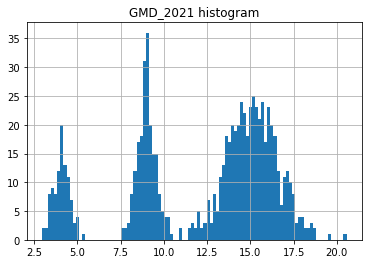

In [16]:
GMD_df.hist(bins=100)
plt.title('GMD_2021 histogram')

As we can see in the thired histogram , $\mu_{3}=15 , $ (like we can see in the first histogram we have $\mu_{1}=4$ and for the secound histogram we have $\mu_{2}=9$)

*** find $w_1$, $w_3$ ***

In [17]:
two option :
    EM

SyntaxError: invalid syntax (<ipython-input-17-7e1d4262aa1e>, line 1)

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#option 1:
#https://stats.stackexchange.com/questions/243392/generate-sample-data-from-gaussian-mixture-model
#Sample I from categorical distribution parametrized by vector w=(w1,…,wd), such that wi≥0 and ∑iwi=1.
#Sample x from normal distribution parametrized by μI and σI.

option 2:
#https://stats.stackexchange.com/questions/70855/generating-random-variables-from-a-mixture-of-normal-distributions
1) Generate a random variable U∼Uniform(0,1)
2) If U∈[∑ki=1pk,∑k+1i=1pk+1) interval, where pk correspond to the the probability of the kth component of the mixture model, then generate from thedistribution of the kth component
3) Repeat steps 1) and 2) until you have the desired amount of samples from the mixture distribution

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)

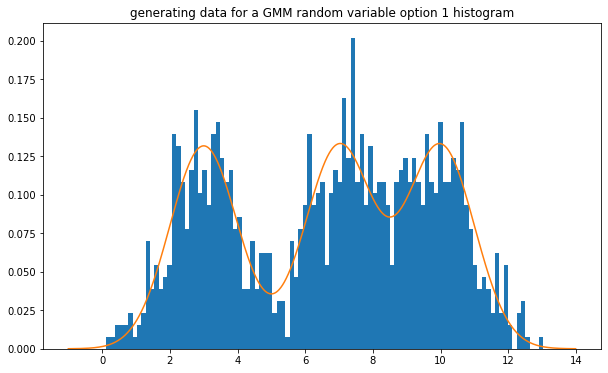

In [19]:
#https://stats.stackexchange.com/questions/70855/generating-random-variables-from-a-mixture-of-normal-distributions

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mu = [3, 7, 10]
sigma = [1, 1, 1]
p_i = [0.33, 0.33, 0.33]
n = 1000

x = []
for i in range(n):
    z_i = np.argmax(np.random.multinomial(1, p_i))
    x_i = np.random.normal(mu[z_i], sigma[z_i])
    x.append(x_i)

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(x, bins=100, density=True)
plt.title('generating data for a GMM random variable option 1 histogram')

def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

a = np.arange(-1, 14, 0.01)
y = p_i[0] * univariate_normal(a, mean=mu[0], variance=sigma[0]**2) + \
    p_i[1] * univariate_normal(a, mean=mu[1], variance=sigma[0]**2) + \
    p_i[2] * univariate_normal(a, mean=mu[2], variance=sigma[0]**2)


ax.plot(a, y)

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [21]:
mu = 70000
sigma = 30000

#### 4.A
What percent of people earn less than 50,000 RCU?

C:\Users\lazrati\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Probability Density')

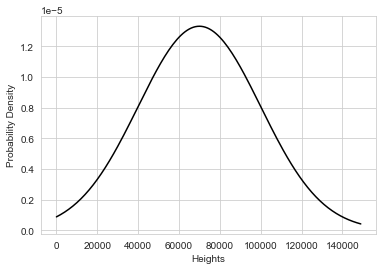

In [42]:
# import required libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
# Creating the distribution
data = np.arange(0,150000,1000)
pdf = norm.pdf(data , loc = mu , scale = sigma )
 
#Visualizing the distribution
 
sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

In [37]:
normcdf = norm(loc = mu , scale = sigma).cdf(50000)
print('{:.2f}% of people earn less than 50000 RCU'.format(normcdf*100))

25.25% of people earn less than 50000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [36]:
a = norm(loc = mu , scale = sigma).cdf(45000)
b = norm(loc = mu , scale = sigma).cdf(65000)

print('{:.2f}% of people earn between 45,000 RCU and 65,000 RCU'.format((b-a)*100))

23.15% of people earn between 45,000 RCU and 65,000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

In [38]:
a = norm(loc = mu , scale = sigma).cdf(70000)

print('{:.2f}% of people earn more than 70,000 RCU'.format((1-a)*100))

50.00% of people earn more than 70,000 RCU


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [41]:
emp=1000
a = norm(loc = mu , scale = sigma).cdf(140000)
print('{:.2f}% of employees earn more than 140,000 RCU'.format((1-a)*emp))

9.82% of employees earn more than 140,000 RCU


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

#### 5.B
Write code to compute the exact value of $V(T_{N})$

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results